In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Bikes

In [2]:
trip = Table.read_table('trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


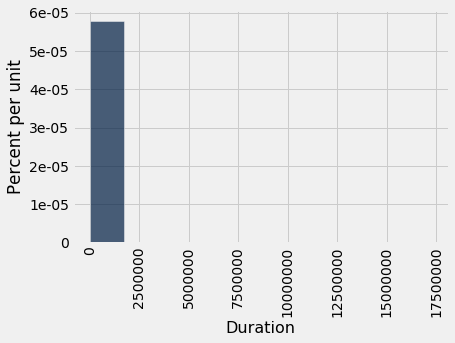

In [3]:
trip.hist('Duration')

In [4]:
max(trip.column('Duration'))/60/60/24

199.88888888888889

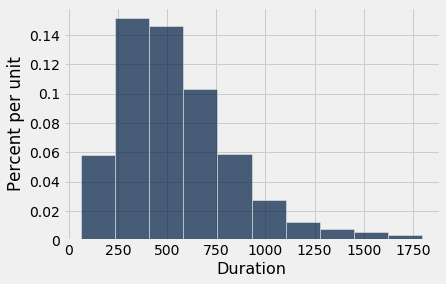

In [5]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

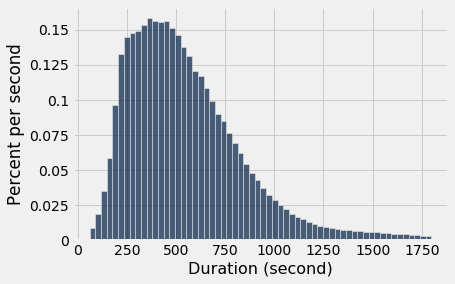

In [6]:
commute.hist('Duration', bins=60, unit='second')

In [7]:
(550-250) * 0.15

45.0

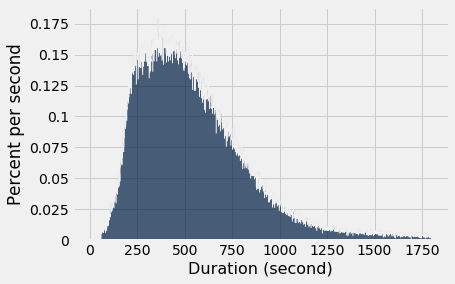

In [ ]:
commute.hist('Duration', bins=np.arange(1801), unit='second')

In [ ]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

In [ ]:
commute.pivot('Start Station', 'End Station')

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest

In [ ]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Duration min')
from_cc

## Maps

In [ ]:
stations = Table.read_table('station.csv')
stations

In [ ]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [ ]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=150)

In [ ]:
from_cc

## Spring 2016 Midterm, Question 2(b)

Challenge yourself and try to solve these on your own before looking at the solutions!

In [ ]:
trip = trip.select('Start Station', 'End Station', 'Duration').relabeled(0, 'Start').relabeled(1, 'End')
trip.show(3)

In [ ]:
# The name of the station where the most rentals ended (assume no ties).

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends

In [ ]:
# The name of the station where the most rentals ended (assume no ties).
# First, find end counts
# Then, find the station with the highest end count
trip.group('End').sort('count', descending=True).column(0).item(0)

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

# First, find the average end time for each station
# Then, keep the ones above 10 minutes
# Then, count them
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

## Advanced Where

In [ ]:
3 > 2

In [ ]:
1 > 2

In [ ]:
np.arange(5) > 2

In [ ]:
commute.show(3)

In [ ]:
just_in_time = commute.column('Duration') == 29 * 60 + 59
just_in_time

In [ ]:
sum(just_in_time)

In [ ]:
commute.where(just_in_time)

In [ ]:
# The average duration of all trips
np.average(commute.column('Duration'))

In [ ]:
# The average duration of trips that started and ended at the same station
same = commute.column('Start Station') == commute.column('End Station')
np.average(commute.where(same).column('Duration'))

In [ ]:
# The average duration of trips that started and ended at different stations
same = commute.column('Start Station') != commute.column('End Station')
np.average(commute.where(same).column('Duration'))